<a href="https://colab.research.google.com/github/jgait/DSPS_WGaither/blob/main/HW4/MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formuale
from IPython.display import Latex



In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v\propto\frac{1}{r}$ from Newron's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

## M31 rotational curve

### data ingestion
( I store the original paper as a link on another computer now I have to find it again :-( - sorry I will updat the reference )

Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [ ]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/m31.csv",
                  sep = ',',
                  skiprows = 1)

m31.rename(columns={"#R(kpc":"r", "V(km/s)":"v", "St.dev.":"dv", "St.error":"err"}, inplace = True)

In [ ]:
m31.head()

,r,v,dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


# exploratory data analysis
proceed with at least a few basic exploratory tasks

In [ ]:
m31.describe()

,r,v,dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


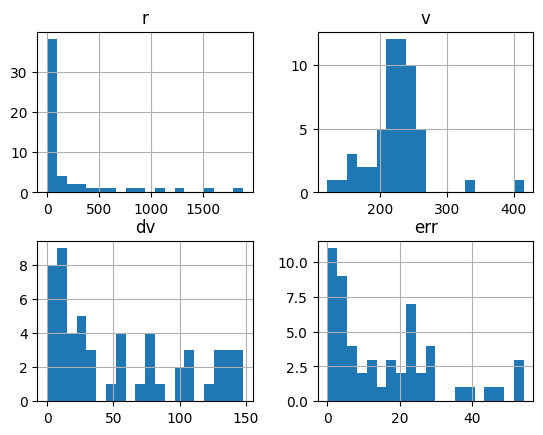

In [ ]:
m31Hist = m31.hist(bins=20)

**Figure 1:** Histogram of the different parameters of this dataset, just used to visualize what we are dealing with and what we should expect.

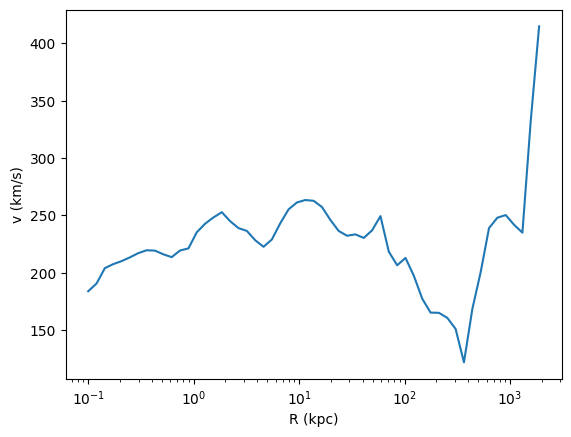

In [ ]:
# Plot it with log x axis in order to see the low end of the data (Useful because velocity scales non-linearly)

pl.plot(m31['r'], m31['v'])
pl.xlabel('R (kpc)')
pl.ylabel('v (km/s)')
pl.xscale('log')
pl.show()

**Figure 2:** Plotted the raw data rotational velocity over the distance on a log scale

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   


In [ ]:
apparentSizeM31 = 3.167


In [ ]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [ ]:
m31Dist = 765 * u.kpc # From wikipedia
m31DistError = 28 * u.kpc # Had to pull this from the underlying wikipedia source

In [ ]:
m31Size = (m31Dist * m31angS.to(u.rad).value)/2 # Discard the radian unit as we are using the y = ra simplification

m31SizeError = m31Size * (np.square(np.sqrt(28/765))) # Didn't convert to kpc since units will cancel!

print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


Size of the visible component of Andromeda: 21 kpc +/- 0.8 kpc


Print the distance like I printed the angular size.

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [ ]:
m31_lum_mass = m31[m31['r'] >= m31Size] # cut out data smaller than calculated size.

min_row = m31_lum_mass[m31_lum_mass['r'] == min(m31_lum_mass['r'])]
print(f"The smallest r value is: {min_row.iloc[0]['r']}")
print(f"The velocity at that radius is: {min_row.iloc[0]['v']}")

The smallest r value is: 23.738
The velocity at that radius is: 236.511


We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [ ]:
# first measurement including all mass
def getradii(data, N, size):
  """
  Function to get the smallest radius of the dataset that is N times the radius
    of the visible galexy

  parameters:
  data  -> the dataset we are extracting from
  N     -> the multiplier of the radius of the galexy
  size  -> size of the luminous component of the galexy

  returns:
  radius, radius uncertainty, velocity, and velocity uncertainty
  """
  filtered_data = data[data['r'] >= N*size]
  small_bear = filtered_data[filtered_data['r'] == min(filtered_data['r'])]

  radius = small_bear.iloc[0]['r']
  d_radius = small_bear.iloc[0]['err']
  vel = small_bear.iloc[0]['v']
  d_vel = small_bear.iloc[0]['dv']

  return radius, d_radius, vel, d_vel

### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

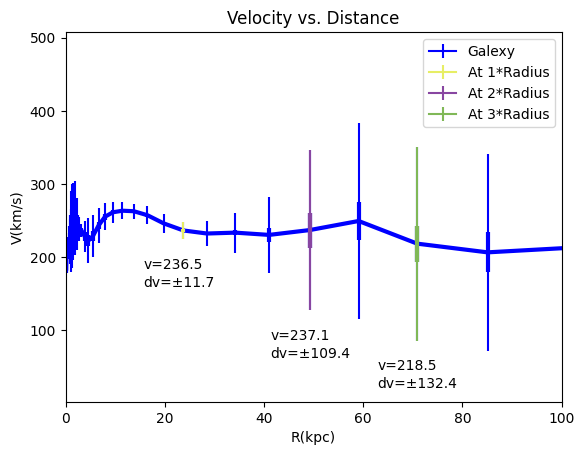

In [ ]:
#delete leave plot
def plotGal(gal, rds):
    #pain
    """
    Function to create error plots of the given galexy dataset with the given
      radii multipliers.

    parameters:
    gal   -> Galexy dataset to plot
    rads  -> radii multipliers
    """
    # First, plot the actual dataset:
    pl.figure()
    pl.errorbar(gal['r'], gal['v'], gal['dv'], color='blue', label='Galexy', zorder=-1)
    pl.errorbar(gal['r'], gal['v'], gal['err'], color='blue', linewidth=3, zorder=0)
    # Snipping this to fit the data like the example image:
    pl.xlim(0, 100)

    # Now loop over all rds
    for rad in rds:
      # Generate random color for this plot:
      color = tuple(np.random.uniform(low=0, high=1.0,size=3))
      # Get the error bar values from earlier function
      r, dr, v, dv = getradii(gal, rad, m31Size)
      # Plot the error bars
      pl.errorbar(r, v, yerr=dv, color=color, label=f'At {rad}*Radius')
      pl.errorbar(r, v, yerr=dr, color=color, linewidth=3)
      # Add the text for the velocity
      pl.text(r-8, v-dv-40, f'v={v:0.1f}')
      pl.text(r-8, v-dv-65, f'dv=±{dv:0.1f}')

    # Add the legend now
    pl.legend(loc='upper right')
    # Label axis and title:
    pl.xlabel("R(kpc)")
    pl.ylabel("V(km/s)")
    pl.title("Velocity vs. Distance")

m31Rds = [1, 2, 3]
plotGal(m31, m31Rds)
#m31, m31Rds

**Figure 3:** Plot showing that the luminous matter velocity does not decrease by the equation given with Newtonian Physics (1/sqrt(n)). Also in this plot are the error bars for the radius, and the radius scaled 2 and 3 times larger with their uncertainties.

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/r$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [ ]:
#delete
# :-(
# Changed variable order to match previous functions.....
def vratios(data, N, size):
  """
  Compare the expected and real velocity ratios for the scaled luminous radii

  parameters:
  data  -> the dataset we are extracting from
  N     -> the multiplier of the radius of the galexy
  size  -> size of the luminous component of the galexy
  """
  # Grab the data at the radius and the scaled radius
  r, dr, v, dv = getradii(data, 1, size)
  r_N, dr_N, v_N, dv_N = getradii(data, N, size)
  # Calculate actual and expected ratios
  actual_ratio = v/v_N
  expected_ratio = np.sqrt(r_N/r)

  # Calculating 2 sigma limits to determine if it follows Newtonian Physics
  sigma = actual_ratio * np.sqrt(np.square(dv/v) + np.square(dv_N/v_N))
  lower = actual_ratio - 2*sigma
  upper = actual_ratio + 2*sigma

  print(f'The actual ratio for V given N={N} is {actual_ratio:0.3f}')
  print(f'The expected ratio for V given N={N} is {expected_ratio:0.3f} with an uncertainty of ±{sigma:0.3f}')

  if expected_ratio >= lower and expected_ratio <= upper:
    print(f'The expected ratio is within the 2 sigma range of the actual ratio')
  else:
    print(f'The expected ratio is NOT within the 2 sigma range of the actual ratio')




In [ ]:
vratios(m31, 1, m31Size)

The actual ratio for V given N=1 is 1.000
The expected ratio for V given N=1 is 1.000 with an uncertainty of ±0.070
The expected ratio is within the 2 sigma range of the actual ratio


In [ ]:
vratios(m31, 5, m31Size)

The actual ratio for V given N=5 is 1.198
The expected ratio for V given N=5 is 2.271 with an uncertainty of ±0.645
The expected ratio is within the 2 sigma range of the actual ratio


In [ ]:
vratios(m31, 12, m31Size)

The actual ratio for V given N=12 is 1.471
The expected ratio for V given N=12 is 3.271 with an uncertainty of ±0.712
The expected ratio is NOT within the 2 sigma range of the actual ratio


### Discuss!

If you increase N to above 10, it stops consistantly being within the 2 sigma range, this means that the farther you go, newtonian physics stops working.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

In [ ]:
# Load in da data.

milk = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW4/mw.csv', sep=',', skiprows=1)
milk.head()

,R(kpc),V(km/s),St.dev.,St.error
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [ ]:
# Fix the column titles:
rename = {"R(kpc)":"r", "V(km/s)":"v", "St.dev.":"dv", "St.error":"err"}
milk.rename(rename, axis=1, inplace=True)
milk.head()

,r,v,dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


#exploring the data

In [ ]:
milk.describe()

,r,v,dv,err
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


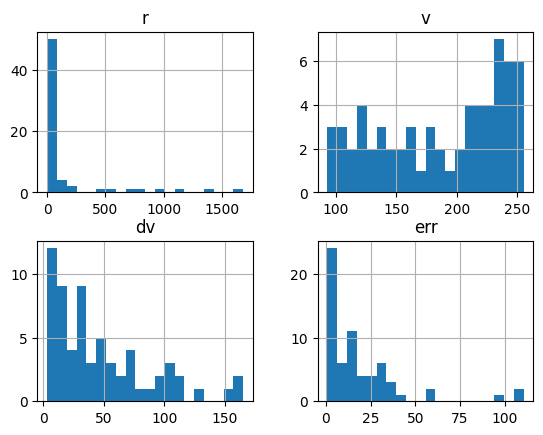

In [ ]:
milkHist = milk.hist(bins=20)

**Figure 4:** Histogram of the different parameters of this dataset, just used to visualize what we are dealing with and what we should expect.

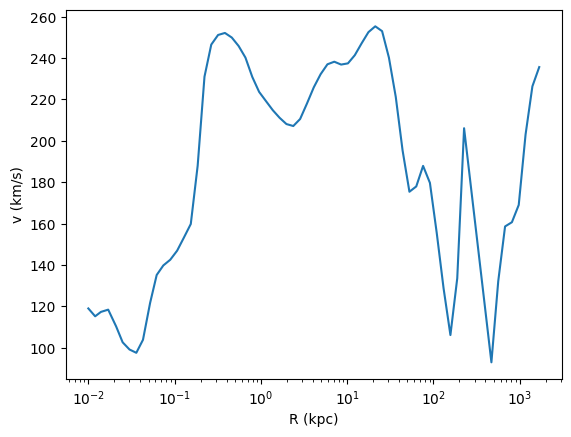

In [ ]:
# Plot it with log x axis in order to see the low end of the data (Useful because velocity scales non-linearly)

pl.plot(milk['r'], milk['v'])
pl.xlabel('R (kpc)')
pl.ylabel('v (km/s)')
pl.xscale('log')
pl.show()

**Figure 5:** Plotted the raw data rotational velocity over the distance on a log scale

# Calculating Size of Milky Way and Error:

In [ ]:
# From wikipedia:
milkSize = 26.8 * u.kiloparsec / 2
milkSizeError = 1.1 * u.kiloparsec

print("Size of the visible component of Andromeda: " +
      r"{:.1f} +/- {:2.1f}".format(milkSize, milkSizeError))

Size of the visible component of Andromeda: 13.4 kpc +/- 1.1 kpc


### find the first measurement  in your data table that includes all the luminous mass.

In [ ]:
milk_lum_mass = milk[milk['r'] >= milkSize] # cut out data smaller than calculated size.

min_row = milk_lum_mass[milk_lum_mass['r'] == min(milk_lum_mass['r'])]
print(f"The smallest r value is: {min_row.iloc[0]['r']}")
print(f"The velocity at that radius is: {min_row.iloc[0]['v']}")

The smallest r value is: 14.698
The velocity at that radius is: 247.075


### data visualization

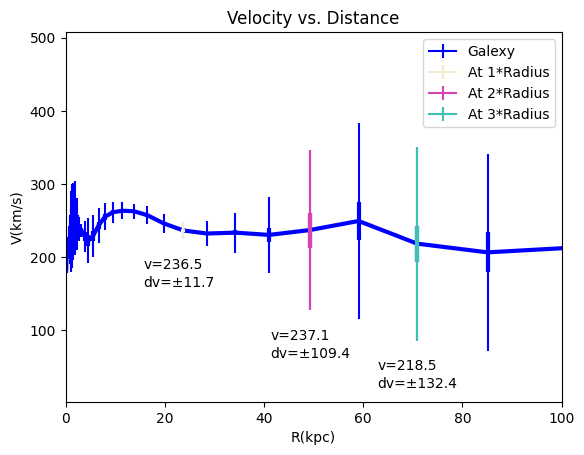

In [ ]:
m31Rds = [1, 2, 3]
plotGal(m31, m31Rds)

**Figure 6:** Plot showing that the luminous matter velocity does not decrease by the equation given with Newtonian Physics (1/sqrt(n)). Also in this plot are the error bars for the radius, and the radius scaled 2 and 3 times larger with their uncertainties.

In [ ]:
vratios(m31, 1, m31Size)

The actual ratio for V given N=1 is 1.000
The expected ratio for V given N=1 is 1.000 with an uncertainty of ±0.070
The expected ratio is within the 2 sigma range of the actual ratio


In [ ]:
vratios(m31, 5, m31Size)

The actual ratio for V given N=5 is 1.198
The expected ratio for V given N=5 is 2.271 with an uncertainty of ±0.645
The expected ratio is within the 2 sigma range of the actual ratio


In [ ]:
vratios(m31, 12, m31Size)

The actual ratio for V given N=12 is 1.471
The expected ratio for V given N=12 is 3.271 with an uncertainty of ±0.712
The expected ratio is NOT within the 2 sigma range of the actual ratio


### Discuss!

If you increase N to above 10, it stops consistantly being within the 2 sigma range, this means that the farther you go, newtonian physics stops working.

https://en.wikipedia.org/wiki/Milky_Way
    